In [1]:
# basics
import numpy as np
import pandas as pd
import datetime
import re
import os,glob
import pickle

# statistics
import statsmodels.api as sm
import statsmodels.formula.api as smf


# plotting
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [15,12]

# own data wrappers
from imp import reload
import measureclass as mc; reload(mc);
import coronadataclass as cdc; reload(cdc);
import crossvalidationclass as cvc; reload(cvc);

np.seterr(divide = 'ignore');




In [2]:
# set cutoff 10 days later to include effects of shiftdays
crossval_2020_03_19 = cvc.CrossValidation(SmoothWindowSize = 15, SmoothStdDev = 2, FinalDate = '29/3/2020')
crossval_2020_03_31 = cvc.CrossValidation(SmoothWindowSize = 15, SmoothStdDev = 2, FinalDate =  '9/4/2020')
crossval_2020_04_06 = cvc.CrossValidation(SmoothWindowSize = 15, SmoothStdDev = 2, FinalDate = '16/5/2020')

In [3]:
shiftdaylist  = np.arange(10)*2
alphalist     = np.power(10,np.linspace(-4,-1,num=7))
crossvalcount = 10

crossval_2020_03_19.RunCV(shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)
crossval_2020_03_31.RunCV(shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)
crossval_2020_04_06.RunCV(shiftdaylist = shiftdaylist, alphalist = alphalist, crossvalcount = crossvalcount)

  0 0.000100        11:54:21
  0 0.000316        11:54:35
  0 0.001000        11:54:46
  0 0.003162        11:54:53
  0 0.010000        11:54:59
  0 0.031623        11:55:05
  0 0.100000        11:55:10
  2 0.000100        11:55:30
  2 0.000316        11:55:46
  2 0.001000        11:55:57
  2 0.003162        11:56:05
  2 0.010000        11:56:12
  2 0.031623        11:56:17
  2 0.100000        11:56:23
  4 0.000100        11:56:43
  4 0.000316        11:56:59
  4 0.001000        11:57:10
  4 0.003162        11:57:18
  4 0.010000        11:57:25
  4 0.031623        11:57:30
  4 0.100000        11:57:36
  6 0.000100        11:57:56
  6 0.000316        11:58:11
  6 0.001000        11:58:22
  6 0.003162        11:58:30
  6 0.010000        11:58:37
  6 0.031623        11:58:43
  6 0.100000        11:58:49
  8 0.000100        11:59:08
  8 0.000316        11:59:24
  8 0.001000        11:59:35
  8 0.003162        11:59:43
  8 0.010000        11:59:50
  8 0.031623        11:59:56
  8 0.100000  

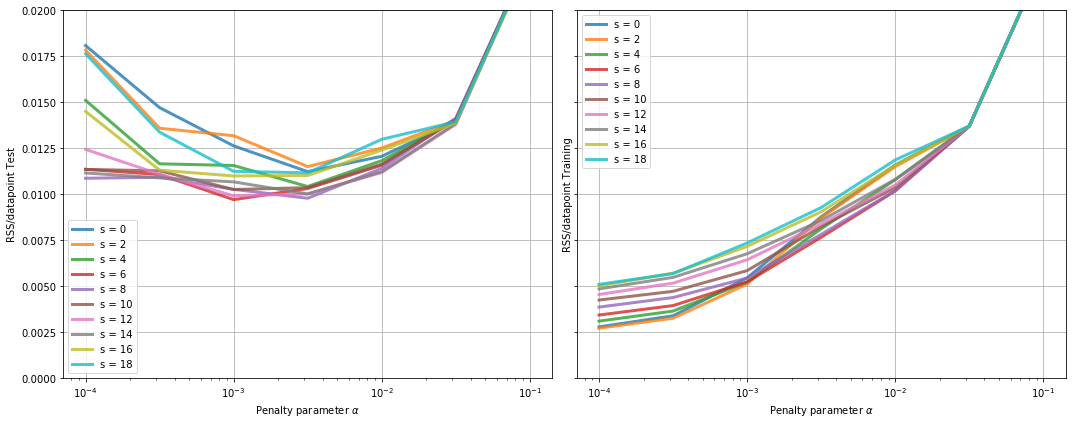

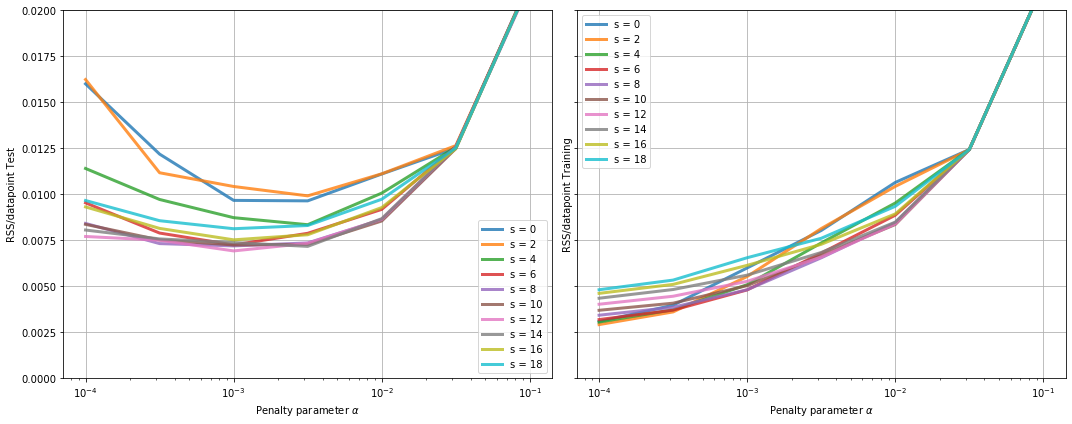

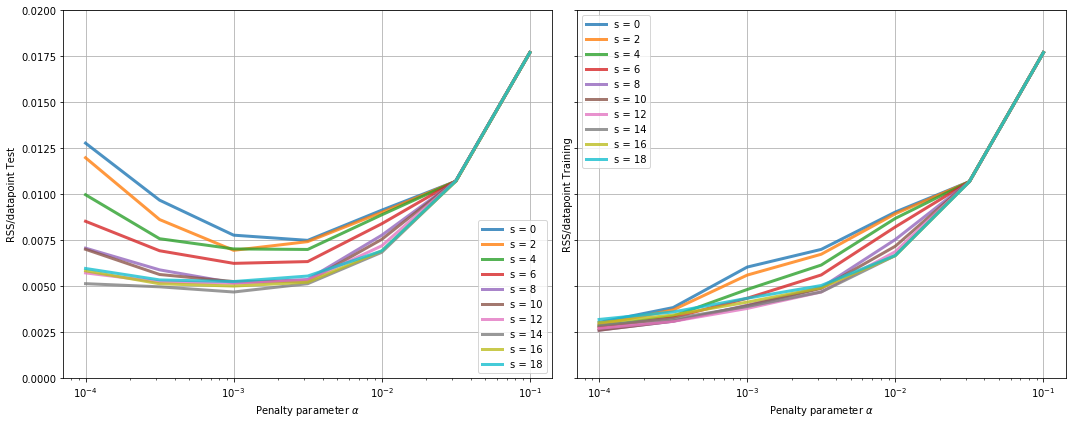

In [5]:
crossval_2020_03_19.PlotCVresults(filename = 'cv_dlC_2020-03-19.pdf', ylim = (0,.02))
crossval_2020_03_31.PlotCVresults(filename = 'cv_dlC_2020-03-31.pdf', ylim = (0,.02))
crossval_2020_04_06.PlotCVresults(filename = 'cv_dlC_2020-04-06.pdf', ylim = (0,.02))

In [6]:
print(crossval_2020_03_19.ProcessCVresults().sort_values(by='RSS Test Sum',ascending=True)[['shiftdays','alpha','RSS Test Sum','Test Sample Size']].head())
print(crossval_2020_03_31.ProcessCVresults().sort_values(by='RSS Test Sum',ascending=True)[['shiftdays','alpha','RSS Test Sum','Test Sample Size']].head())
print(crossval_2020_04_06.ProcessCVresults().sort_values(by='RSS Test Sum',ascending=True)[['shiftdays','alpha','RSS Test Sum','Test Sample Size']].head())


    shiftdays     alpha  RSS Test Sum  Test Sample Size
23          6  0.001000     10.974681              1131
33          8  0.003162     11.059999              1131
44         12  0.001000     11.206779              1131
54         14  0.003162     11.323587              1131
47         12  0.003162     11.328659              1131
    shiftdays     alpha  RSS Test Sum  Test Sample Size
44         12  0.001000     11.428845              1653
54         14  0.003162     11.836162              1653
30          8  0.001000     11.879641              1653
37         10  0.001000     11.963081              1653
23          6  0.001000     11.969853              1653
    shiftdays     alpha  RSS Test Sum  Test Sample Size
51         14  0.001000     14.780781              3159
55         14  0.000316     15.672581              3159
58         16  0.001000     15.799089              3159
62         16  0.000316     16.197392              3159
54         14  0.003162     16.208888           

In [7]:
crossval_2020_03_19.ComputeFinalModels(modelparameters=[(6,1e-3)])
crossval_2020_03_31.ComputeFinalModels(modelparameters=[(12,1e-3)])
crossval_2020_04_06.ComputeFinalModels(modelparameters=[(14,1e-3)])


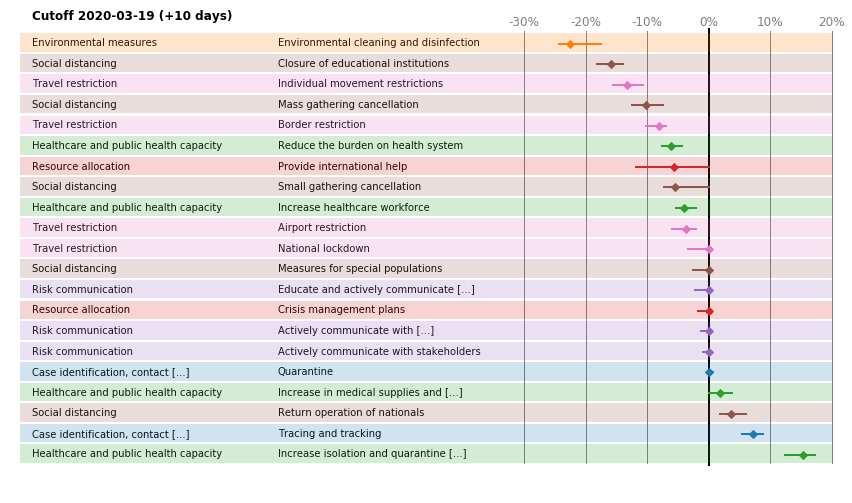

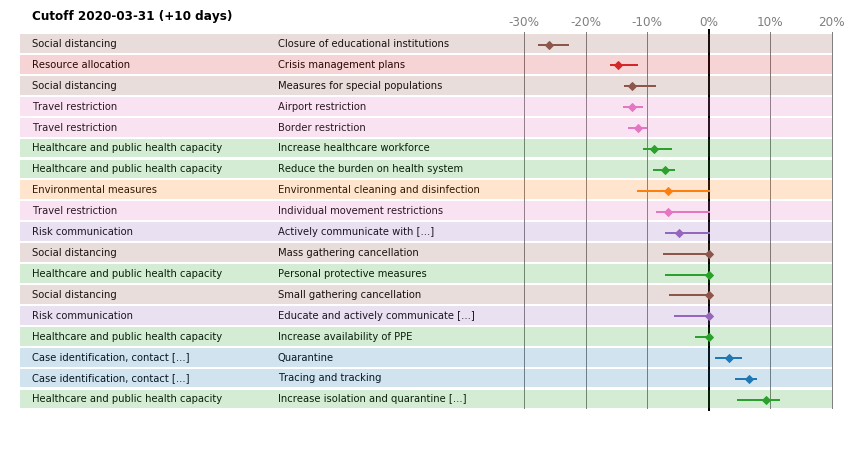

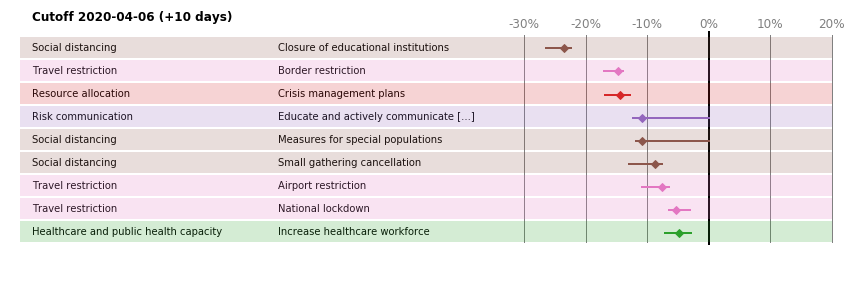

In [11]:
crossval_2020_03_19.PlotMeasureListSorted(drop_zeros=True,figsize = (15,9),title = 'Cutoff 2020-03-19 (+10 days)',filename = 'measures_dlC_cutoff20200319.pdf',graylines=[-30,-20,-10,10,20])
crossval_2020_03_31.PlotMeasureListSorted(drop_zeros=True,figsize = (15,8),title = 'Cutoff 2020-03-31 (+10 days)',filename = 'measures_dlC_cutoff20200331.pdf',graylines=[-30,-20,-10,10,20])
crossval_2020_04_06.PlotMeasureListSorted(drop_zeros=True,figsize = (15,5),title = 'Cutoff 2020-04-06 (+10 days)',filename = 'measures_dlC_cutoff20200406.pdf',graylines=[-30,-20,-10,10,20])